# Stat project 5

На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

- В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
- Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый
Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

## Задания
1. Выберите метод, который предположительно подойдет в первом вопросе.
2. Проверьте, являются ли дисперсии внутри групп гомогенными.
3. Проведите тест на нормальность распределения.
4. Сравните средние в представленных группах.
5. Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
6. Примите решение: какие картинки в итоге будем использовать?
7. Выберите метод для второго теста.
8. Визуализируйте распределение events для контрольной и тестовой групп. 
9. Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 
10. Выберите формулу для модели, проведите тест.

## Описание данных
**5_task_1:**

- id – id клиента в эксперименте
- group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
- events – сколько блюд суммарно было заказано за период

**5_task_2:**

- id – id клиента в эксперименте
- segment – сегмент (high/low)
- group – вид кнопки (control – старая версия, test – новая версия)
- events – сколько блюд суммарно было заказано за период

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as st

import seaborn as sns 
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [6]:
#для дисп анализа
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
#пингвин
import pingouin as pg

In [7]:
sns.set(rc={'figure.figsize': (12, 6)}, style="whitegrid")

In [8]:
# таблица 5_task_1
df_1 = pd.read_csv('./5_task_1.csv')
#  таблица 5_task_2
df_2 = pd.read_csv('./5_task_2.csv')

# Задание 1
Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

Hint: scipy.stats.levene либо pingouin.homoscedasticity

In [9]:
df_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [10]:
df_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [11]:
df_1.group.unique()

array(['A', 'B', 'C'], dtype=object)

In [12]:
#прверяем дисперсии
pg.homoscedasticity(data=df_1, dv='events', group='group')

,W,pval,equal_var
levene,2.26226,0.104133,True


In [13]:
#или
scipy.stats.levene(df_1.query("group == 'A'").events, 
                   df_1.query("group == 'B'").events, 
                   df_1.query("group == 'C'").events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

**вывод**
p-value > 0.05, не отклоняем нулевую гипотезу

# Задание 2
Также убедитесь, что данные распределены нормально - тем же способом, что и в прошлом уроке.

Дополнительно: сравните  результат с qq-графиками. Какой вывод можно сделать по совокупности этих методов?

In [14]:
pg.normality(data=df_1, dv='events', group='group', method='normaltest')#на крупные выборки

,W,pval,normal
group,,,
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


In [15]:
pg.normality(data=df_1, dv='events', group='group', method='shapiro')#слишком много наблюдений не очень исп

c:\Users\Ann Zalivatskaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\Ann Zalivatskaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\Ann Zalivatskaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
group,,,
A,0.998933,0.000004,False
B,0.999016,0.000011,False
C,0.998920,0.000003,False


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

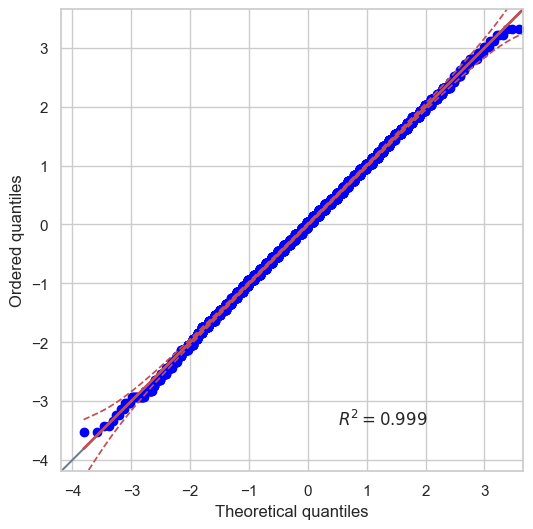

In [16]:
#qq-plot
pg.qqplot(df_1.query("group == 'A'").events)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

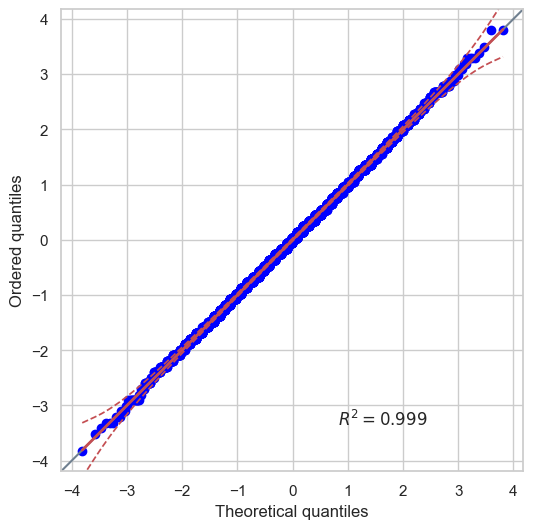

In [17]:
#qq-plot
pg.qqplot(df_1.query("group == 'B'").events)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

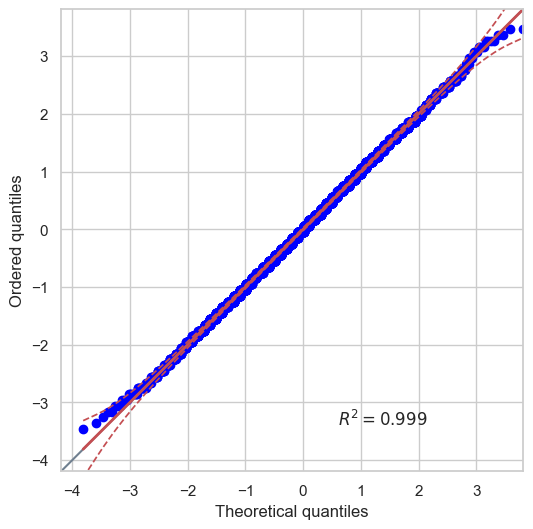

In [18]:
#qq-plot
pg.qqplot(df_1.query("group == 'C'").events)

**Вывод**
- Распределение events в группе С является нормальным
- Распределение events в группе B является нормальным
- Распределение events в группе A является нормальным

# Задание 3
Самое время провести тест!

In [19]:
scipy.stats.f_oneway(df_1.query("group == 'A'").events, 
                     df_1.query("group == 'B'").events, 
                     df_1.query("group == 'C'").events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [20]:
#группы между собой ощутимо различаются

In [21]:
pg.anova(data=df_1, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


**Вывод**
Для сравнения средних я использую **ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ**. Значение статистики равно (окр. до целого) **2886**, а р-уровень значимости составил **0**.

# Задание 4
Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

Дополнительно: попробуйте другие варианты поправок на множественные сравнения через pingouin. Дают ли они те же выводы, что и Тьюки?

(понять какие группы между собой отличаются)

In [22]:
sm.stats.multicomp.pairwise_tukeyhsd(df_1.events, df_1.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.0,7.7038,8.3642,True
A,C,-2.1093,0.0,-2.4395,-1.7791,True
B,C,-10.1433,0.0,-10.4735,-9.8131,True


In [23]:
#вар2
MultiComp = MultiComparison(df_1['events'], groups=df_1['group'])
print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034   0.0   7.7038  8.3642   True
     A      C  -2.1093   0.0  -2.4395 -1.7791   True
     B      C -10.1433   0.0 -10.4735 -9.8131   True
----------------------------------------------------


Text(0, 0.5, 'Число покупок')

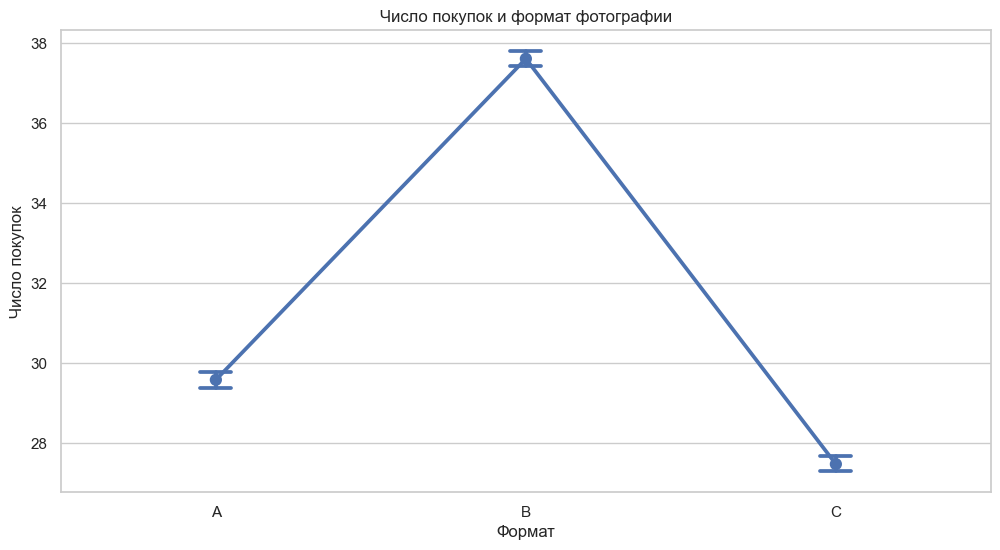

In [24]:
#граф отображение
sns.pointplot(x='group', y='events', data = df_1, capsize = .1)
plt.title('Число покупок и формат фотографии')
plt.xlabel('Формат')
plt.ylabel('Число покупок')

In [25]:
#пингвин
pg.pairwise_tukey(data = df_1, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.024138


In [26]:
#если волнует неравенство дисперсий
pg.pairwise_gameshowell(data=df_1, dv='events', between='group')
#hedges - насколько в стандартных отклоениях отличаются средние

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140920,-57.011134,19987.258491,6.412648e-13,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.141696,14.886135,19995.116233,0.000000e+00,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140062,72.420220,19995.502469,0.000000e+00,1.024138


In [27]:
#доп делает то же самое 
#padjust='bonf' - поправка
pg.pairwise_ttests(data=df_1, dv='events', between='group', padjust='bonf')

c:\Users\Ann Zalivatskaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
c:\Users\Ann Zalivatskaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
c:\Users\Ann Zalivatskaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,A,B,False,True,-57.011134,19998.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.806229
1,group,A,C,False,True,14.886135,19998.0,two-sided,7.500262e-50,2.250078e-49,bonf,1.054e+46,0.210514
2,group,B,C,False,True,72.420220,19998.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,1.024138


**Статистически значимые:**
- A и B
- B и C
- A и C

# Задание 5
Так какие картинки в итоге будем использовать?

In [28]:
df_1.groupby('group').agg({'events' : 'sum'})

,events
group,
A,295796
B,376136
C,274703


**Ответ:** B – Квадратные

# Задание 6
Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

Какой метод скорее всего пригодится в данном случае?

**Ответ:** многофакторный дисперсионный анализ

# Задание 7
Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп. Соотнесите графики распределения и экспериментальные группы:

In [29]:
df_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [30]:
df_2.segment.unique()

array(['high', 'low'], dtype=object)

In [31]:
df_2.group.unique()

array(['test', 'control'], dtype=object)

<Axes: xlabel='events', ylabel='Count'>

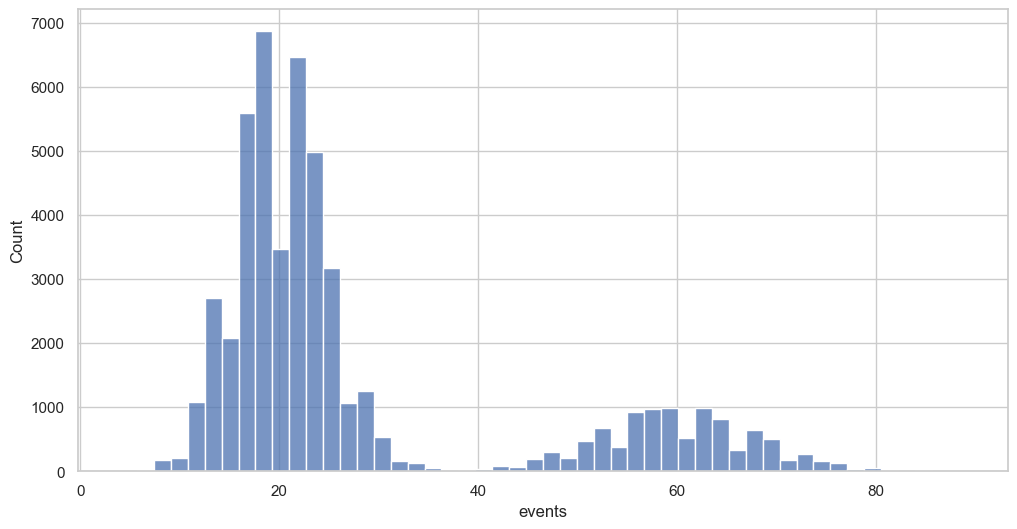

In [32]:
sns.histplot(x=df_2.query("group == 'control'").events, bins=50)

<Axes: xlabel='events', ylabel='Count'>

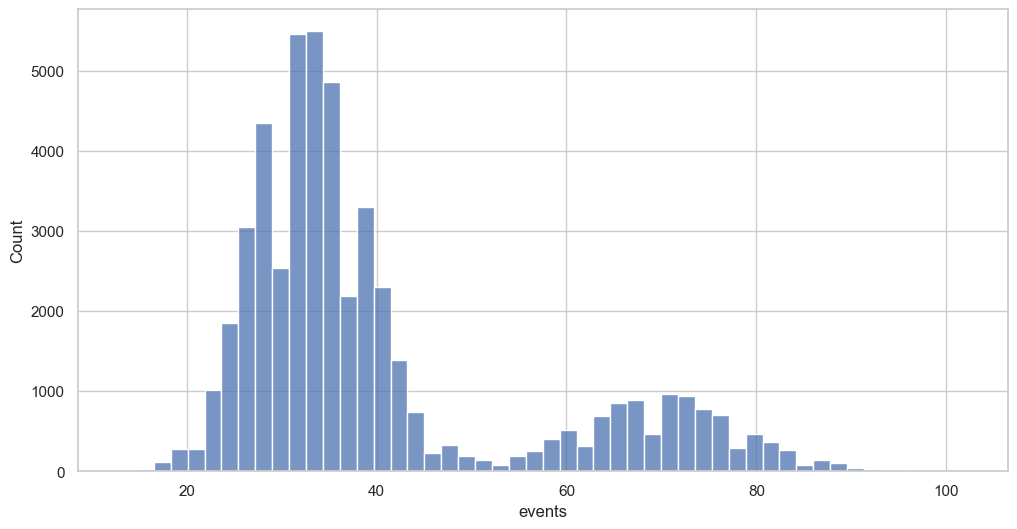

In [33]:
sns.histplot(x=df_2.query("group == 'test'").events, bins=50)

# Задание 8
Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2 знаков после точки.

In [34]:
df_2.groupby(['group', 'segment'], as_index=False).agg({'events' : ['mean', 'median', 'std']}).round(2)

group segment events             
                     mean median   std
0  control    high  59.97   60.0  7.81
1  control     low  20.03   20.0  4.47
2     test    high  69.94   70.0  8.40
3     test     low  33.03   33.0  5.72

In [35]:
df_2.groupby(['group', 'segment'])['events'].describe().T.round(2)

group     control                test          
segment      high       low      high       low
count    10000.00  40000.00  10000.00  40000.00
mean        59.97     20.03     69.94     33.03
std          7.81      4.47      8.40      5.72
min         31.00      4.00     40.00     13.00
25%         55.00     17.00     64.00     29.00
50%         60.00     20.00     70.00     33.00
75%         65.00     23.00     76.00     37.00
max         89.00     41.00    102.00     59.00

C:\Users\Ann Zalivatskaya\AppData\Local\Temp\ipykernel_23080\1721457029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2.query("segment == 'low' & group == 'test'").events, label='low test')
C:\Users\Ann Zalivatskaya\AppData\Local\Temp\ipykernel_23080\1721457029.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

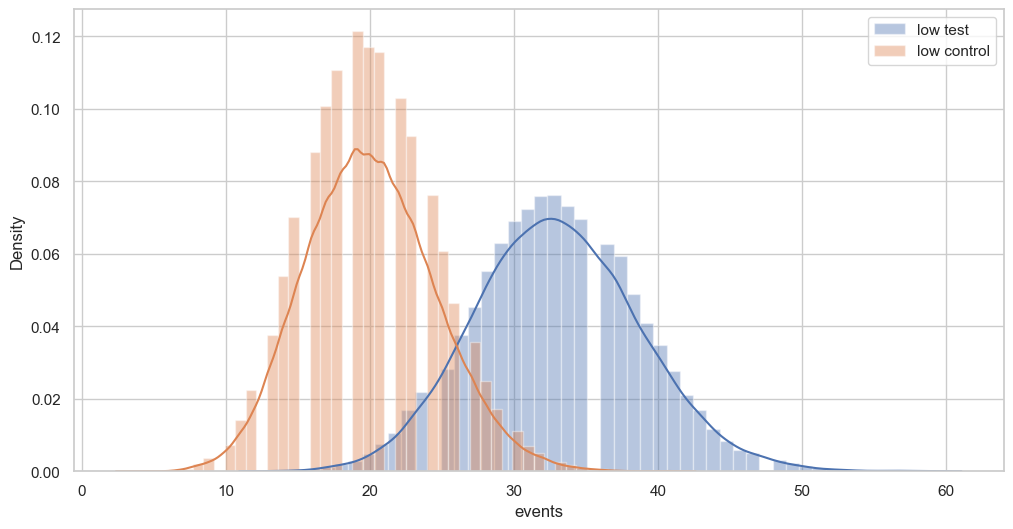

In [36]:
sns.distplot(df_2.query("segment == 'low' & group == 'test'").events, label='low test')
sns.distplot(df_2.query("segment == 'low' & group == 'control'").events, label='low control')
plt.legend()

C:\Users\Ann Zalivatskaya\AppData\Local\Temp\ipykernel_23080\3061341068.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2.query("segment == 'high' & group == 'test'").events, label='high test')
C:\Users\Ann Zalivatskaya\AppData\Local\Temp\ipykernel_23080\3061341068.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

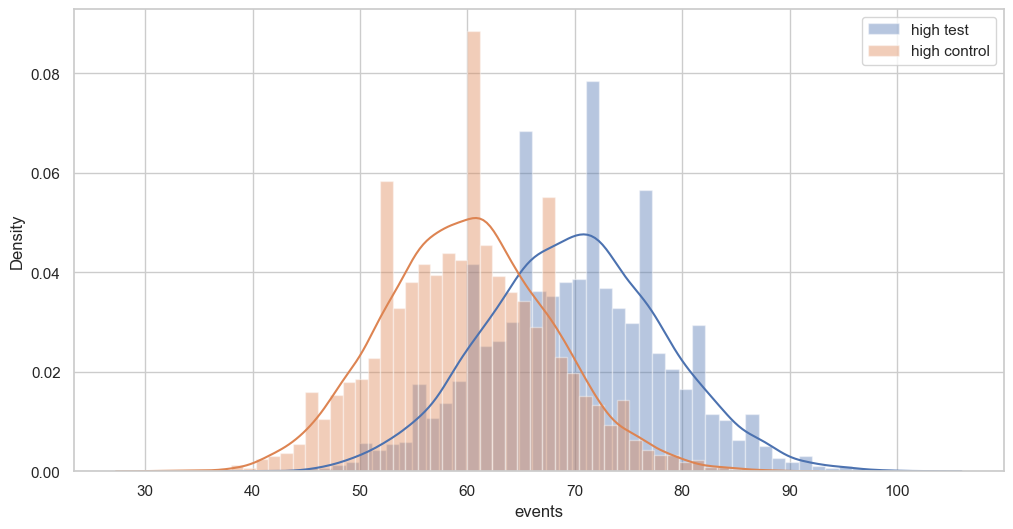

In [37]:
sns.distplot(df_2.query("segment == 'high' & group == 'test'").events, label='high test')
sns.distplot(df_2.query("segment == 'high' & group == 'control'").events, label='high control')
plt.legend()

# Задание 9
Почти у цели – осталось выбрать формулу для модели. Напомним, что мы хотим проверить эффект нескольких переменных – group и segment – на events, с взаимодействием факторов.

Если вы прибегнете к statsmodels, то какую формулу используете?

**Ответ:** events ~ segment + group + segment:group

# Задание 10
Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey:

Между какими группами были обнаружены статистически значимые различия? Выберите верные утверждения:

Note: При интерпретации обратите внимание на то, какая из групп с какой сравнивается и как считается meandiff.

In [38]:
#statsmodels
model = smf.ols(formula='events ~ segment + group + segment:group', data=df_2).fit()
table = anova_lm(model)

In [39]:
table

,df,sum_sq,mean_sq,F,PR(>F)
segment,1.0,2.362480e+07,2.362480e+07,689756.377484,0.000000e+00
group,1.0,3.837195e+06,3.837195e+06,112031.864119,0.000000e+00
segment:group,1.0,3.664244e+04,3.664244e+04,1069.823273,2.060261e-233
Residual,99996.0,3.424956e+06,3.425093e+01,NaN,NaN


In [40]:
pg.anova(data = df_2, dv='events', between=['group', 'segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


**Ответ:**
1. Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13
2. Разница между control/high и test/high составила около 10
3. Для обоих сегментов показатели статистически значимо увеличились по сравнению с контрольной группой

# Задание 11
Визуализируйте результаты теста и заполните пропуски:

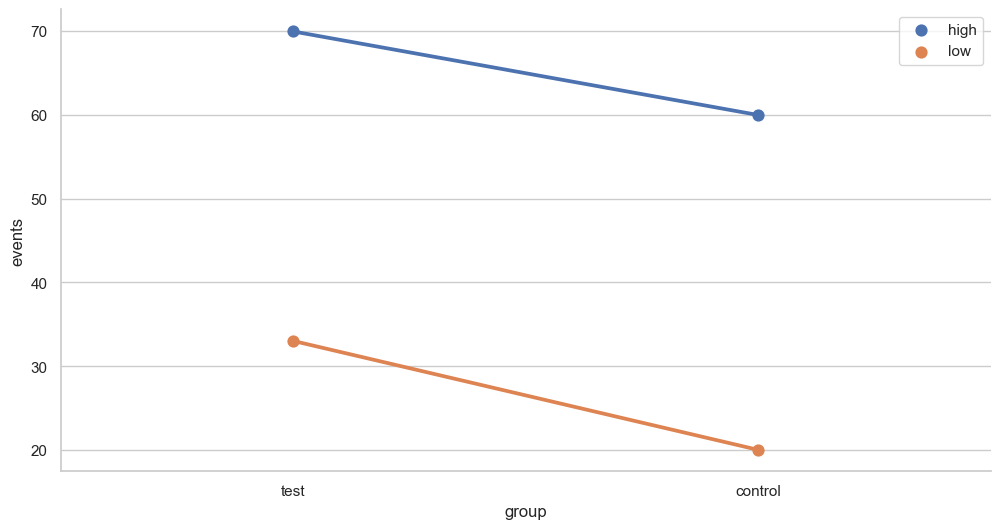

In [41]:
sns.pointplot(x='group' , y='events' , data=df_2, hue='segment')
sns.despine()
plt.legend()

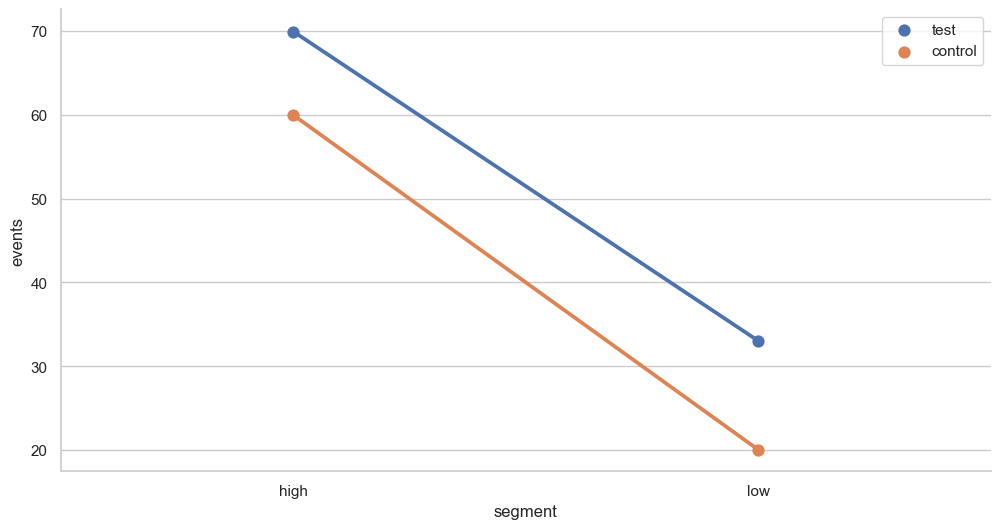

In [42]:
sns.pointplot(x='segment' , y='events' , data=df_2, hue='group')
sns.despine()
plt.legend()

In [43]:
df_2['combination'] = df_2.group + '\\' + df_2.segment
df_2['combination']

0          test\high
1          test\high
2          test\high
3          test\high
4          test\high
            ...     
99995    control\low
99996    control\low
99997    control\low
99998    control\low
99999    control\low
Name: combination, Length: 100000, dtype: object

pg.pairwise_tukey(data=df_2, dv='events', between='combination')

In [44]:
sm.stats.multicomp.pairwise_tukeyhsd(df_2.events, df_2.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control,test,12.389,0.0,12.185,12.593,True


In [45]:
sm.stats.multicomp.pairwise_tukeyhsd(df_2.events, df_2.segment).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-38.4259,0.0,-38.5583,-38.2935,True


Фактор group оказался **ЗНАЧИМЫМ**, фактор segment – **ЗНАЧИМЫМ**, их взаимодействие – **ЗНАЧИМО**. Судя по графику, для всех групп среднее значение events **УВЕЛИЧИЛОСЬ**, поэтому решение: **ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ**.